# Task : Stock Price Prediction  

# Dataset Description: INR=X.csv

The dataset, named INR=X.csv, contains historical stock market data for a particular stock. The data is presented in a tabular format with several columns capturing various aspects of the stock's performance.

## Features of the Dataset:

Date: The date of the stock market data in the format "YYYY-MM-DD".

Open: The opening price of the stock on a particular date.

High: The highest price of the stock reached during the day.

Low: The lowest price of the stock reached during the day.

Close: The closing price of the stock on a particular date.

Adj Close: The adjusted closing price of the stock on a particular date. The adjusted closing price accounts for factors such as dividends, stock splits, and other corporate actions.

Volume: The trading volume of the stock on a particular date. It represents the number of shares traded during the day.

# Objective of the Project:

The objective of this project is to build a predictive model for stock price prediction using the provided dataset. The model will utilize historical stock market data to forecast the future closing price of the stock. By analyzing patterns and trends captured in the historical data, the model aims to provide insights into potential future price movements.

Stock price prediction is a challenging task as it involves complex interactions between various market factors. Successful predictions can enable investors to make informed decisions and potentially improve investment returns.

# Link for the Dataset:
https://drive.google.com/drive/folders/10p_Rc36Uq_1vP31mTHqHfjHnd0cObG0m

# Data Preparation

In [222]:
# Importing the libraries

import numpy as np
# numpy is aliased as np
import pandas as pd
# pandas is aliased as pd
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import seaborn as sns
# seaborn is aliased as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [223]:
# LOading the dataset
sp = pd.read_csv('/content/INR=X.csv')
sp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0
...,...,...,...,...,...,...,...
257,2021-01-20,73.192001,73.192299,72.899300,73.191902,73.191902,0
258,2021-01-21,72.907898,73.045303,72.883003,72.910896,72.910896,0
259,2021-01-22,72.954903,73.237503,72.929001,72.954903,72.954903,0
260,2021-01-25,72.995903,73.220001,72.877998,72.995903,72.995903,0


In [224]:
# Showing First 5 and Last 5 rows
print(sp.head())
print(sp.tail())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2020-01-27  71.320000  71.635002  71.320000  71.324997  71.324997       0
1  2020-01-28  71.654999  71.654999  71.178001  71.440002  71.440002       0
2  2020-01-29  71.230103  71.425003  71.168503  71.230400  71.230400       0
3  2020-01-30  71.300003  71.711998  71.300003  71.300003  71.300003       0
4  2020-01-31  71.639999  71.639999  71.277496  71.639999  71.639999       0
           Date       Open       High        Low      Close  Adj Close  Volume
257  2021-01-20  73.192001  73.192299  72.899300  73.191902  73.191902       0
258  2021-01-21  72.907898  73.045303  72.883003  72.910896  72.910896       0
259  2021-01-22  72.954903  73.237503  72.929001  72.954903  72.954903       0
260  2021-01-25  72.995903  73.220001  72.877998  72.995903  72.995903       0
261  2021-01-26  72.970001  73.222000  72.774498  72.970001  72.970001       0


# Basic Understanding of the Dataset

In [225]:
# showing dimension of the dataset
rows, columns = sp.shape
print(f"The dataset has {rows} rows and {columns} columns.")

The dataset has 262 rows and 7 columns.


In [226]:
# checking for columns
sp.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [227]:
# showing the information about the dataset
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       262 non-null    object 
 1   Open       262 non-null    float64
 2   High       262 non-null    float64
 3   Low        262 non-null    float64
 4   Close      262 non-null    float64
 5   Adj Close  262 non-null    float64
 6   Volume     262 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.5+ KB


## Observations:
1. There are 262 rows and 7 columns in the dataset.
2. There are no missing values in the dataset.
3. Date column is of object type which needs to be converted to datetime
4. All the columns are of numeric type.

In [228]:
# Descriptive Statistics Analysis of Data
sp.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,262.0,74.373533,1.417620,71.100403,73.546175,74.332001,75.484551,77.684998
High,262.0,74.631087,1.494521,71.279999,73.706577,74.531300,75.737499,77.754997
Low,262.0,74.011048,1.311330,71.064003,73.202003,73.881748,75.067053,76.496300
Close,262.0,74.358489,1.426245,71.099998,73.531049,74.275799,75.489424,77.570000
Adj Close,262.0,74.358489,1.426245,71.099998,73.531049,74.275799,75.489424,77.570000
Volume,262.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Data Preprocessing and Data Cleaning

## Data Type Conversion

In [229]:
# checking for datatypes
sp.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [230]:
# converion of Object to Datetime data type
sp['Date'] = pd.to_datetime(sp['Date'])

# checking for data types
sp.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

## Handling Duplicated Values

In [231]:
# checking foer duplicated values
sp.duplicated().sum()

0

No Duplicated Values Found

## Handling Missing Values

In [232]:
# checking for missing values
sp.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

No Missing Values Found

In [233]:
# checking for unique values
sp.nunique()

Date         262
Open         255
High         247
Low          260
Close        257
Adj Close    257
Volume         1
dtype: int64

## Outliers Detection

<Axes: >

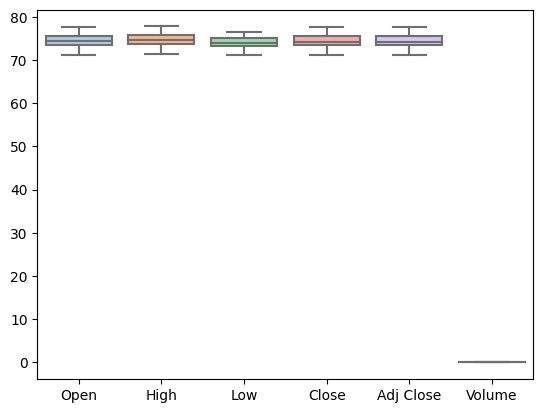

In [234]:
# Plotting BoxPlot for checking for outliers
sns.boxplot(sp,palette='pastel')

No Outliers Found

## Sorting Data by Datewise

In [235]:
# Sorting the Date of Date Column
sp = sp.sort_values('Date')
sp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0
...,...,...,...,...,...,...,...
257,2021-01-20,73.192001,73.192299,72.899300,73.191902,73.191902,0
258,2021-01-21,72.907898,73.045303,72.883003,72.910896,72.910896,0
259,2021-01-22,72.954903,73.237503,72.929001,72.954903,72.954903,0
260,2021-01-25,72.995903,73.220001,72.877998,72.995903,72.995903,0


# Data Visualization

## Plotting HistPlot for Stock Price

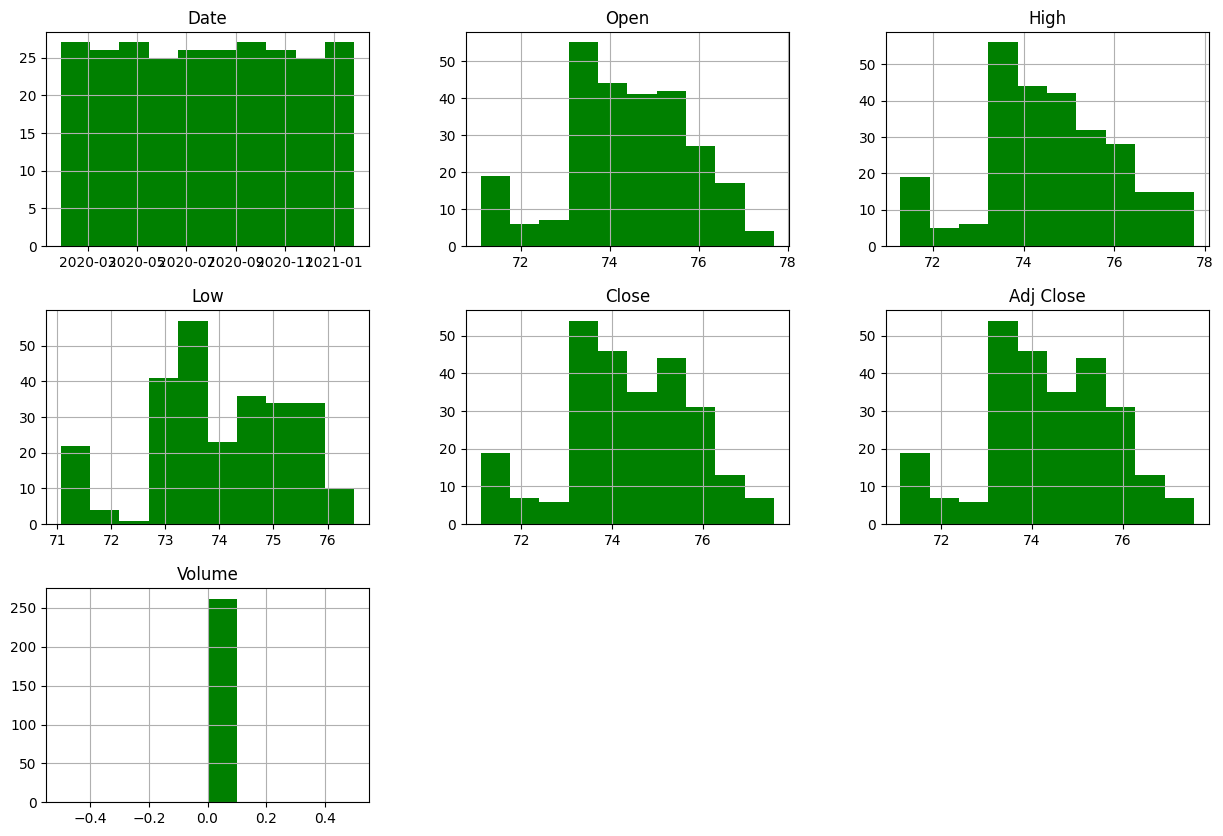

In [236]:
# PLotting histPlot
sp.hist(figsize=(15,10),color='green')
plt.show()

## Viualization of Different Times of Prices (Open, High, Low, Close, Adj Close)

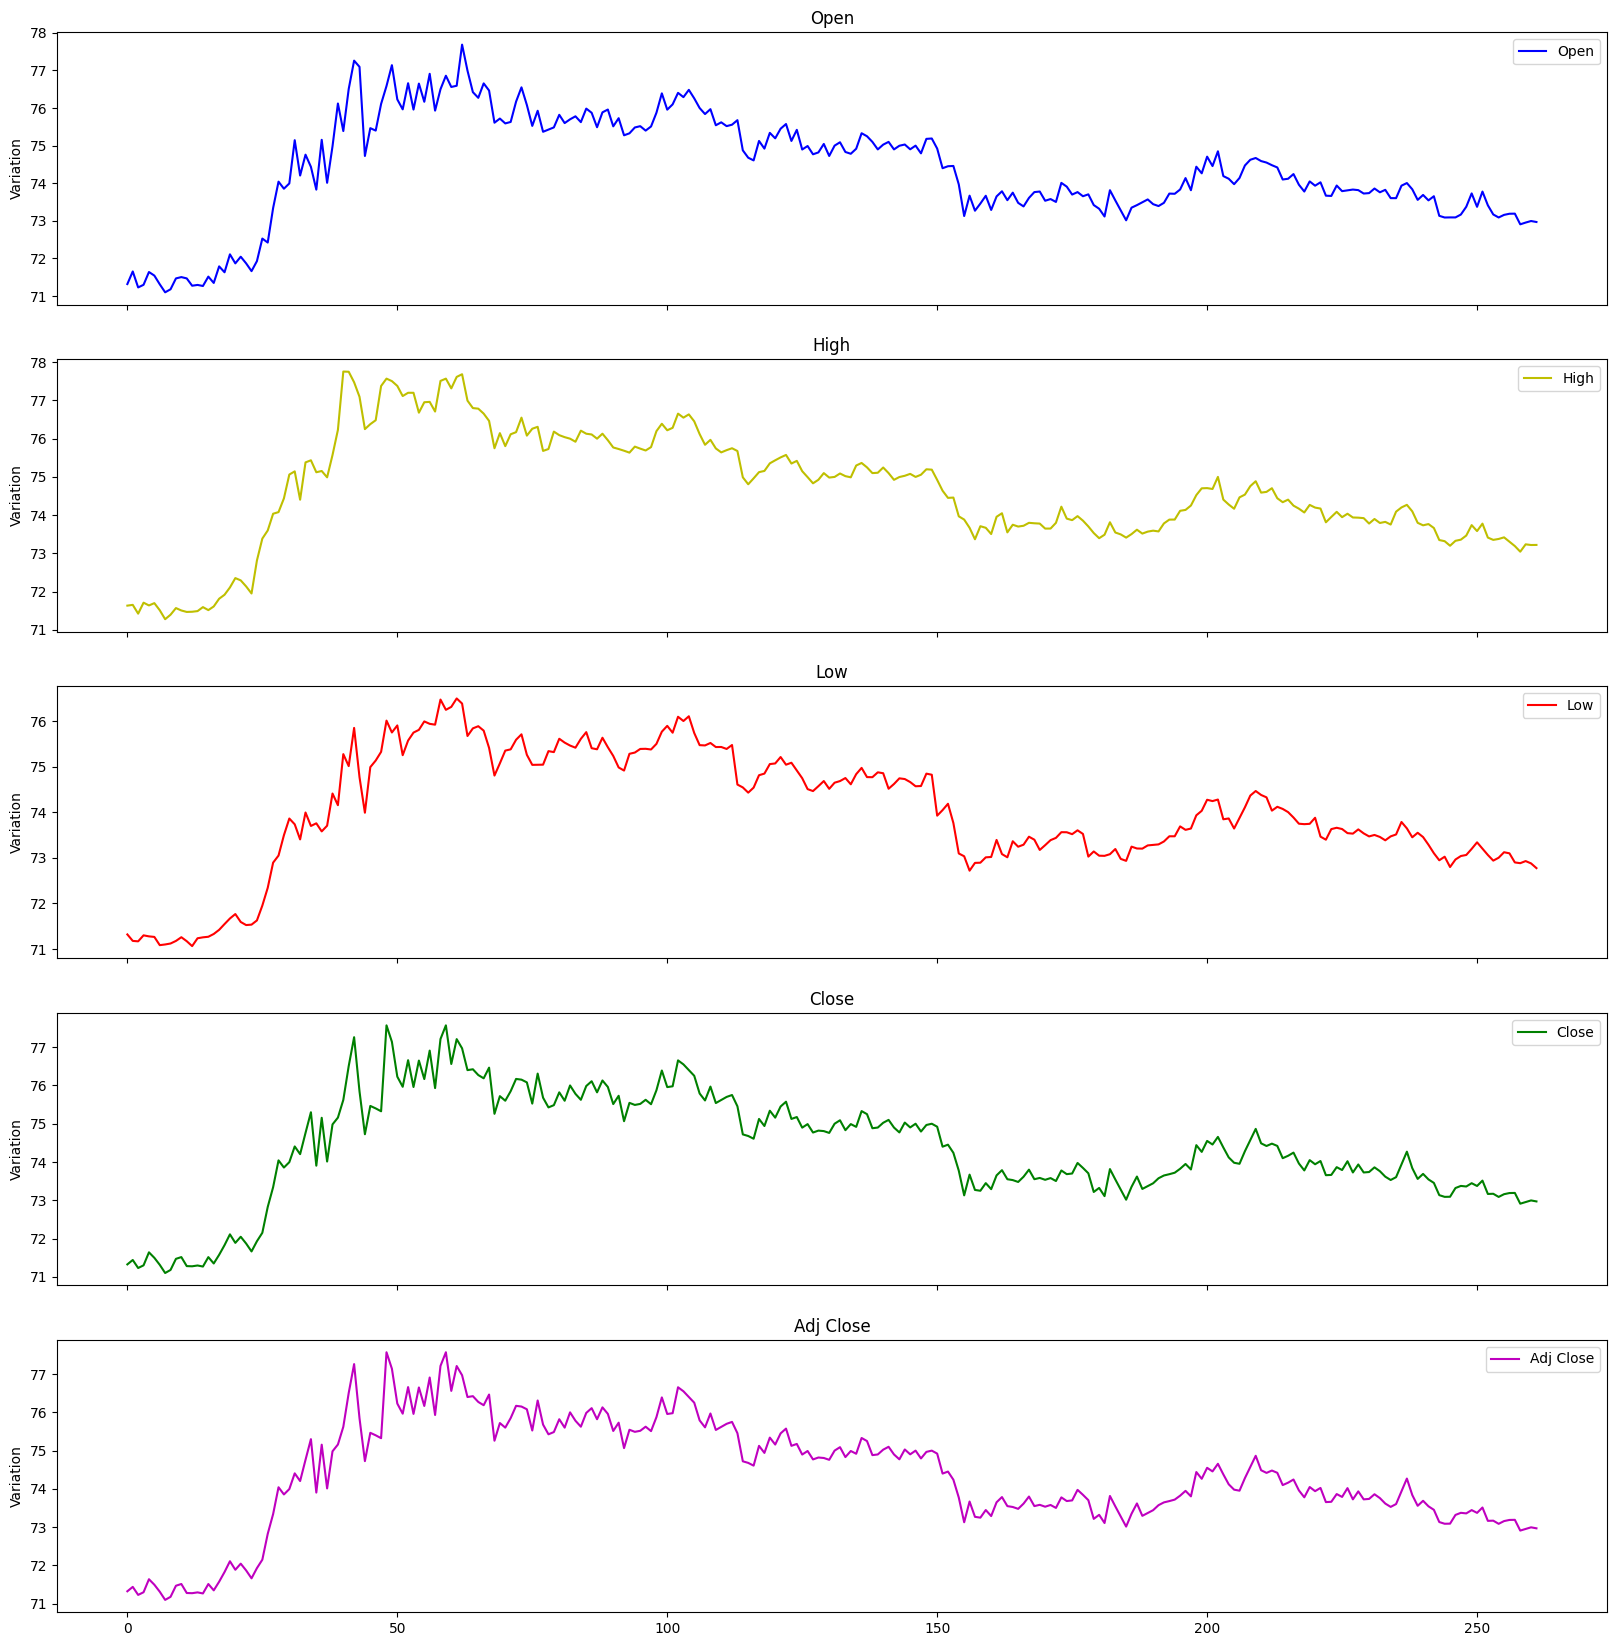

In [237]:
cols_plot = ['Open', 'High', 'Low', 'Close', 'Adj Close']
colors = ['b', 'y', 'r', 'g', 'm']
axes = sp[cols_plot].plot(alpha=1, figsize=(20, 20), subplots=True, color=colors)

# Loop through the axes and set the title for each subplot
for i, ax in enumerate(axes):
    ax.set_ylabel('Variation')
    ax.set_title(cols_plot[i])

# Add some space between subplots to prevent overlapping titles
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()


## Plotting Correlation Matrix

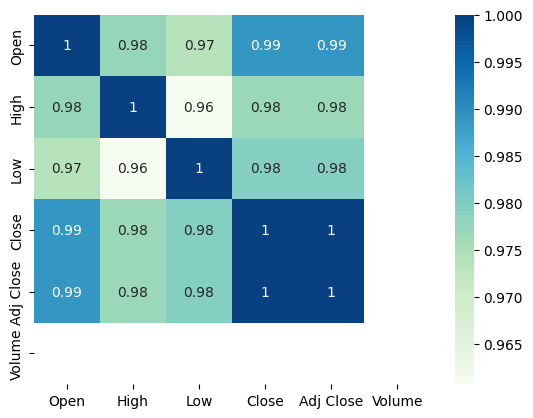

In [238]:
# plotting heatmap
sns.heatmap(sp.corr(), annot = True, cmap = 'GnBu')
plt.show()

#### Observations:

1. There is a strong positive correlation between Open and Close.
2. There is a strong positive correlation between High and Close.
3. There is a strong positive correlation between Low and Close.
4. There is a strong positive correlation between Adj Close and Open.
5. There is a strong positive correlation between Adj Close and High.
6. There is a strong positive correlation between Adj Close and Low.

## Plotting Pairwise Relationship of Data

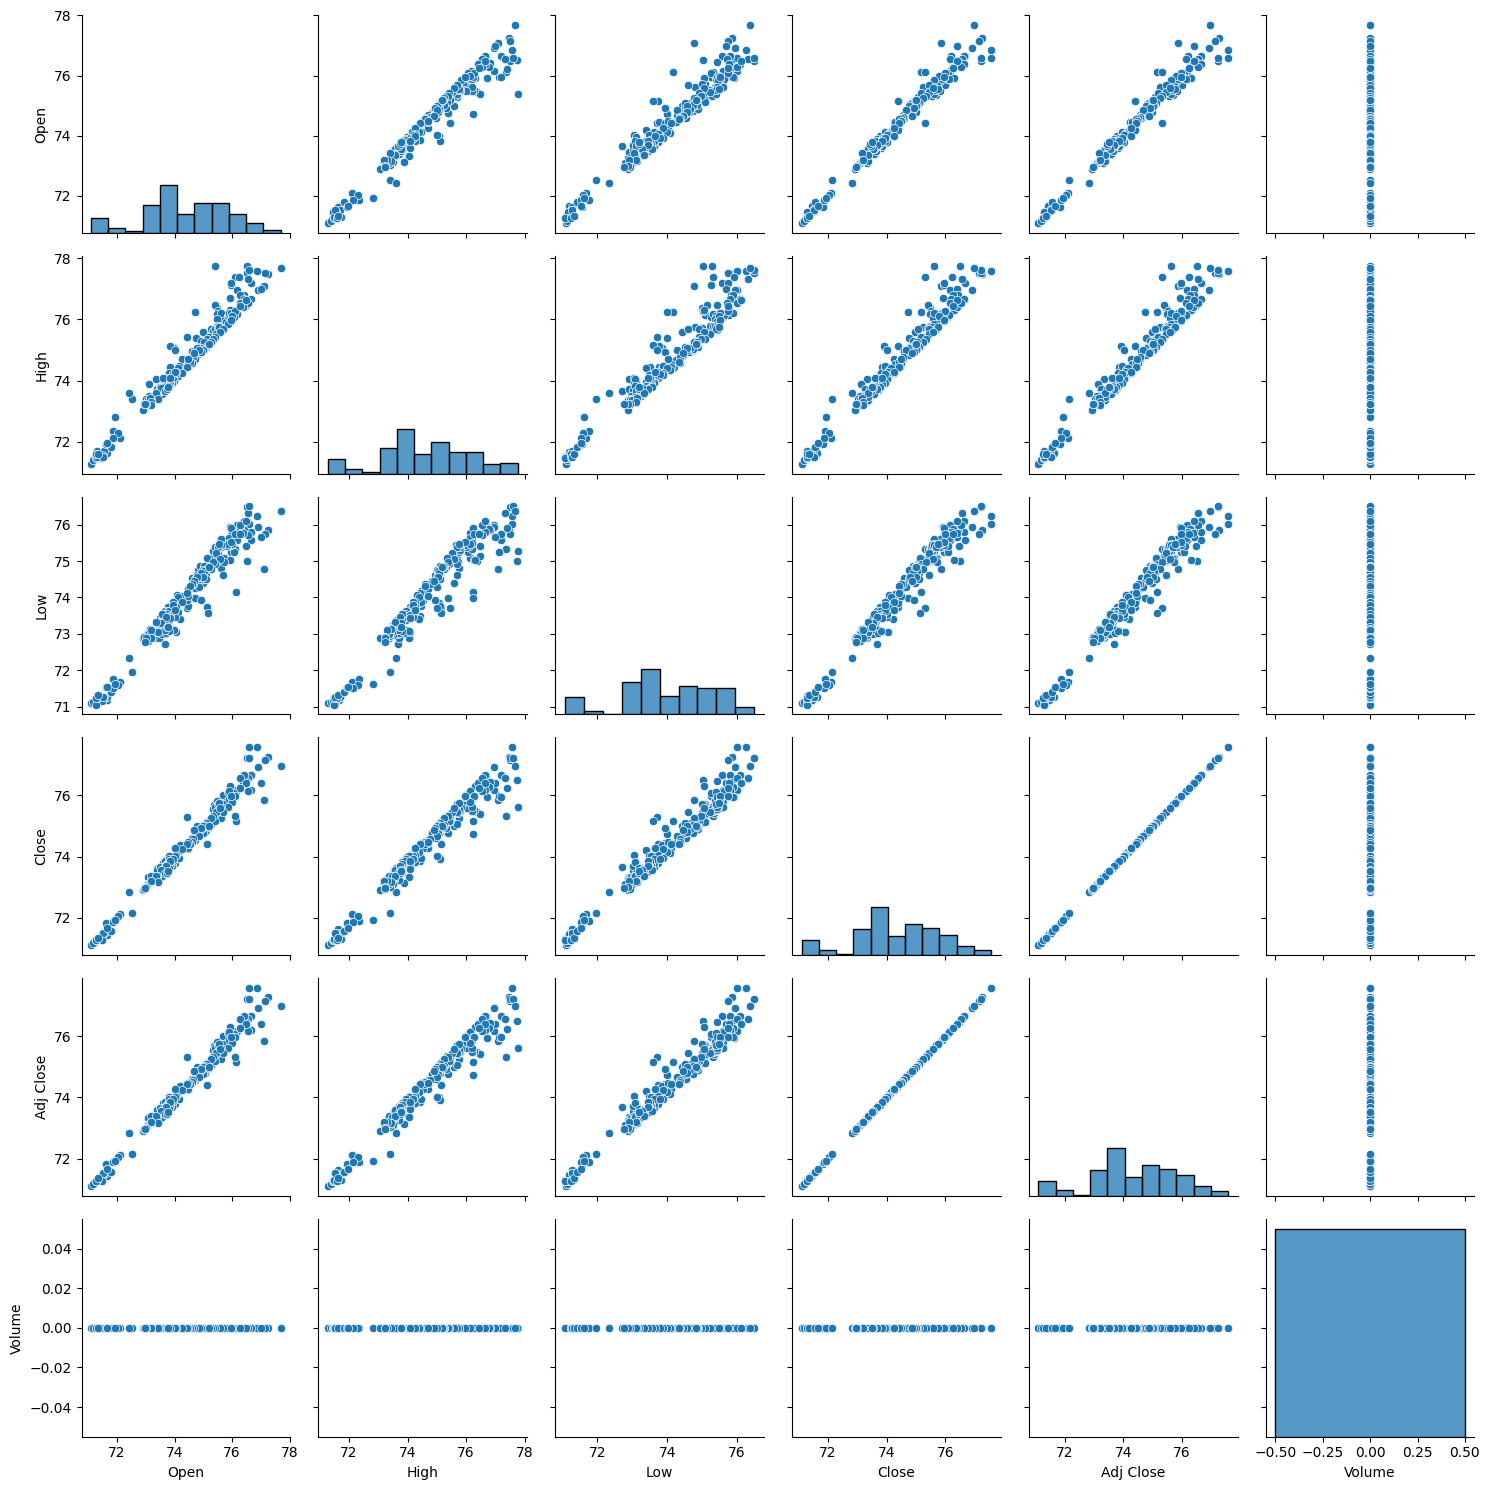

In [239]:
sns.pairplot(sp)
plt.tight_layout()

# Fearure Selection


There are some unnecessary columns which have no use in model building , Like :

1. Date : This column has no use in model building.
2. Adj Close : This column has no use in model building because the adjusted closing price are the same as the closing price.
3. Volume : This column has no use in model building because it contains only single value.

In [240]:
# Removing Unnecessary columns
sp = sp.drop(['Date','Adj Close','Volume'], axis=1)

# Checking for columns
sp.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

# Selecting independent and the dependent features from the dataset

In [241]:
x = sp[['Open', 'High', 'Low']]
y = sp['Close']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(262, 3)
(262,)


# Train Test Split

In [242]:
# Dividing the data into training and testing data
from sklearn.model_selection import train_test_split

print(262*0.20)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

52.400000000000006
(209, 3)
(53, 3)
(209,)
(53,)


# Creating functions to evaluate the Regression Evaluation Metrics, Model Score.

In [243]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def reg_eval_metrics(ytest, ypred):
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    rmse = np.sqrt(mean_squared_error(ytest, ypred))
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)


def mscore(model):
    print('Training Score',model.score(x_train,y_train)) # Trainng R2 score
    print('Testing Score',model.score(x_test,y_test))    # Testing R2 Score

# Importing the ML Regression libraries

In [244]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# 1. Linear Regression

Linear regression is a statistical model used for analyzing and predicting the relationship between a dependent variable (often called the target) and one or more independent variables (often called predictors or features). The model assumes a linear relationship between the variables, which can be represented as a straight line in a two-dimensional space or a hyperplane in higher dimensions. The goal of linear regression is to find the best-fitting line (or hyperplane) that minimizes the sum of the squared differences between the observed and predicted values. This line can then be used to make predictions or understand the relationship between the variables. Linear regression is widely used in various fields for tasks such as prediction, trend analysis, and understanding cause-and-effect relationships.






In [245]:
# Building the Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

# Computing Training and Testing score
mscore(lin_reg)

# Generating Prediction
ypred_lr = lin_reg.predict(x_test)
ypred_lr

# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_lr)

# Evaluating Model : R2 score
r2_lr = r2_score(y_test,ypred_lr)*100
r2_lr

Training Score 0.9831201765953287
Testing Score 0.9897637025098684
MAE: 0.10883437017048543
MSE: 0.018801144836548156
RMSE: 0.13711726673380037


98.97637025098685

# 2. Support Vector Regression (SVR)

Support Vector Regression (SVR) is a regression algorithm that finds a hyperplane to model the relationship between variables. It uses a margin-based approach, introducing a margin around predicted values. SVR can handle non-linear data by using kernel functions and is effective in scenarios with outliers. Support Vector Regression (SVR) is useful for stock price prediction because it can handle the inherent complexity and non-linearity often found in financial data. It's used in finance, engineering, and other fields to capture complex relationships between variables.

In [246]:
# Building the Support Vector Regression Model
svr = SVR(kernel='rbf')
svr.fit(x_train,y_train)

# Computing Training and Testing score
mscore(svr)

# Generating Prediction
ypred_svr = svr.predict(x_test)
ypred_svr

# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_svr)

# Evaluating Model : R2 score
r2_svr = r2_score(y_test,ypred_svr)*100
r2_svr

Training Score 0.9845052734079325
Testing Score 0.9854414736407846
MAE: 0.12343574742701624
MSE: 0.02673984054783436
RMSE: 0.1635232110369484


98.54414736407846

# Comapring Both the Models

In [247]:
# Creating a dataframe showing R2_score of both model
models = pd.DataFrame({
    'Model': ['Linear Regression','Support Vector Regression'],
    'Score': [r2_lr,r2_svr]})

models.sort_values(by='Score',ascending=False)

,Model,Score
0,Linear Regression,98.976370
1,Support Vector Regression,98.544147


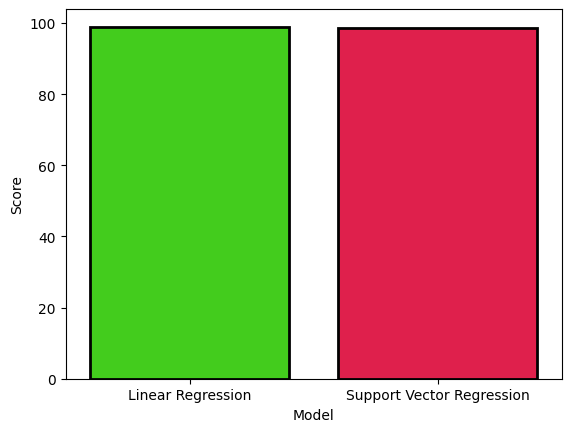

In [248]:
# Plotting R2_score of both model on a bar graph

sns.barplot(x=models['Model'],y=models['Score'],palette='prism', edgecolor='black', linewidth=2)
plt.xticks()
plt.show()

## It is Clearly visible that Linear Regression has the highest R2_score and thus it is the best model.

# Generating Predictions on Test data using GradientBoosting Regressor

In [249]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [250]:
prediction = model.predict(x_test)
prediction

array([73.32742319, 74.18088851, 73.71211877, 73.69721233, 76.48872279,
       75.17470851, 73.71284494, 73.02279645, 71.39011517, 74.85701876,
       71.98559977, 73.81026989, 75.57251597, 74.16264741, 73.5290988 ,
       73.15864483, 75.627571  , 71.26716788, 74.70499073, 76.23591905,
       75.07905509, 74.93475734, 71.98088821, 74.3866789 , 75.58771584,
       74.67797063, 75.52796494, 75.46342557, 75.54841721, 71.43587697,
       74.17719137, 73.71456331, 73.7038239 , 75.62085897, 74.6868665 ,
       73.08239633, 76.38904711, 73.80570934, 74.62710956, 71.42424749,
       73.60721816, 75.54586986, 75.09896974, 75.5742489 , 72.507272  ,
       73.5038397 , 73.71460181, 71.65158206, 75.85342954, 74.9886853 ,
       73.1195845 , 73.51166415, 75.42658391])

# Save the Model

In [251]:
import pickle

pickle.dump(model, open('stock_price.pkl', 'wb')) # wb = write binary

# Load the Model

In [252]:
loaded_model = pickle.load(open('stock_price.pkl', 'rb'))  # rb = read binary
loaded_model.predict(x_test)

array([73.32742319, 74.18088851, 73.71211877, 73.69721233, 76.48872279,
       75.17470851, 73.71284494, 73.02279645, 71.39011517, 74.85701876,
       71.98559977, 73.81026989, 75.57251597, 74.16264741, 73.5290988 ,
       73.15864483, 75.627571  , 71.26716788, 74.70499073, 76.23591905,
       75.07905509, 74.93475734, 71.98088821, 74.3866789 , 75.58771584,
       74.67797063, 75.52796494, 75.46342557, 75.54841721, 71.43587697,
       74.17719137, 73.71456331, 73.7038239 , 75.62085897, 74.6868665 ,
       73.08239633, 76.38904711, 73.80570934, 74.62710956, 71.42424749,
       73.60721816, 75.54586986, 75.09896974, 75.5742489 , 72.507272  ,
       73.5038397 , 73.71460181, 71.65158206, 75.85342954, 74.9886853 ,
       73.1195845 , 73.51166415, 75.42658391])